In [2]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#Jupyter magic to notify when a cell finishes execution with %%notify command -- does not work with Jupyterlab
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

#%pdb

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
def loadfile_sws(mean, var, zmean, zvar, tau, temp, mixtures, model, data_size = "full",  scaling = False, model_save_dir = "", fn="", file = "res"):
    s = "s" if scaling else "f" 
    exp_name = "{}_m{}_zm{}_r{}_t{}_m{}_kdT{}_{}_{}".format(model, mean, zmean, 50, tau, int(mixtures), int(temp), s, data_size) + fn
    if (file=='res'):
        with open(model_save_dir + '/mnist_retrain_res_{}.p'.format(exp_name),'rb') as f:
            file = pickle.load(f)
    if (file=='gmp'):
        with open(model_save_dir + '/mnist_retrain_gmp_{}.p'.format(exp_name),'rb') as f:
            file = pickle.load(f)
    if (file=='model'):
        file = torch.load(model_save_dir + '/mnist_retrain_model_{}.m'.format(exp_name))
    return file

In [6]:
def loadfile(mean, zmean, tau, temp, mixtures, model, data_size = "full",  scaling = False, model_save_dir = "", fn="", file = "res"):
    r = 30 if file == 'ures' else 50
    exp_name = "{}_m{}_zm{}_r{}_t{}_m{}_kdT{}_{}".format(model, mean, zmean, r, tau, int(mixtures), int(temp),data_size) + fn
    if (file=='res' or file == 'ures' or file == 'gmp'):
        with open(model_save_dir + '/mnist_retrain_layer_{}_{}.p'.format(file, exp_name),'rb') as f:
            file = pickle.load(f)
    if (file=='model'):
        file = torch.load(model_save_dir + '/mnist_retrain_model_{}.m'.format(exp_name))
    return file

In [45]:
sws_res = loadfile_sws(100, 10, 2500, 1250, 1e-6, int(0), 15, "LeNet_300_100", model_save_dir = "../writeup/sws/files")

res = loadfile(mean = 5000, zmean = 5000, tau = 1e-5, temp = 1, mixtures = 15, model = "LeNet_300_100FC1", data_size = 'search', scaling = False, model_save_dir = "./expfiles")

In [44]:
with open('./expfiles/mnist_retrain_layer_ures_min_error.p','rb') as f:
    minres = pickle.load(f)
(minres['pre-prune_acc']['test'], minres['pre-sp'], minres['prune_acc']['test'], minres['sparsity'])

(9.93, 76.28033457109635, 80.45, 78.1283522748584)

In [51]:

with open('./expfiles/mnist_retrain_layer_ures_LeNet_300_100_m5000_zm5000_r30_t1e-05_m15_kdT4_search.p','rb') as f:
    t5 = pickle.load(f)
(t5['pre-prune_acc']['test'], t5['pre-sp'], t5['prune_acc']['test'], t5['sparsity'])

(15.26, 98.45767225535427, 11.42, 98.92764712501406)

In [54]:
ures = loadfile(mean = 5000, zmean = 5000, tau = 1e-6, temp = 4, mixtures = 15, model = "LeNet_300_100", data_size = 'search', scaling = False, model_save_dir = "./expfiles", file ="ures")
(ures['pre-prune_acc']['test'], ures['pre-sp'], ures['prune_acc']['test'], ures['sparsity'])

(88.71, 70.13352837477964, 91.4, 91.51307152769964)

{'test': 9.74, 'train': 9.82, 'val': 10.09}

In [47]:
res['prune_test']

15.2

In [11]:
res.keys()

dict_keys(['complexity_loss', 'train_loss', 'data_size', 'prune_val', 'var', 'init_weights', 'gmp_mixprop', 'prune_acc', 'gmp_means', 'temp', 'prune_weights', 'gmp_stddev', 'prune_test', 'val_loss', 'epochs', 'tau', 'sparsity', 'val_acc', 'mean', 'test_acc', 'compress_test', 'train_acc', 'scale', 'final_weights', 'zvar', 'zmean', 'test_loss', 'mixtures', 'compress_val'])

In [53]:
ures['pre-prune_acc']

{'test': 15.26, 'train': 14.88, 'val': 15.54}

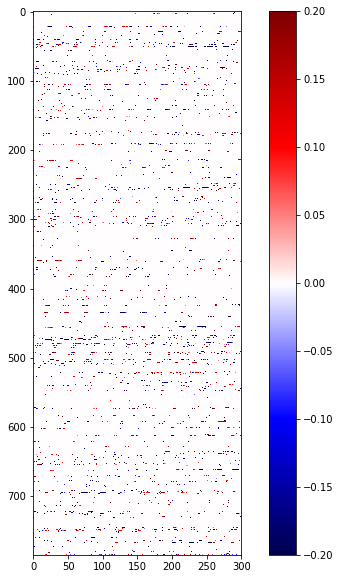

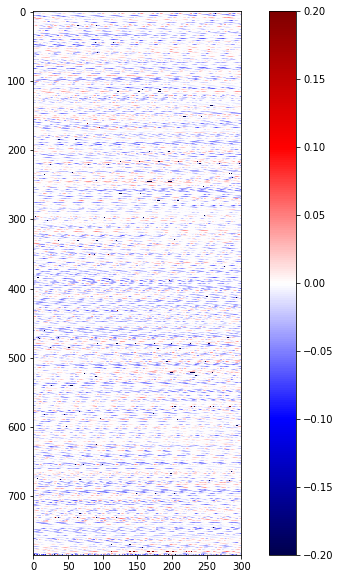

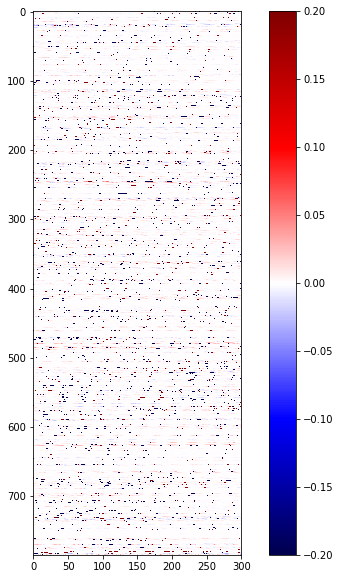

In [59]:
weights = np.resize(sws_res['final_weights']['fc1'], (785, 300))
f = plt.figure(figsize=(10,10))
ax = f.gca()
c=0.2
s = ax.imshow(weights, cmap='seismic', interpolation='none', vmin=-c, vmax=c)
f.colorbar(s)
#plt.figure(figsize=(10,10))
plt.savefig('./expfiles/swsfc1.png')
plt.savefig('./expfiles/swsfc1.eps', format='eps', bbox_inches="tight",  dpi=400)
plt.show()

weights = np.resize(res['final_weights']['fc1'], (785, 300))
f = plt.figure(figsize=(10,10))
ax = f.gca()
c=0.2
s = ax.imshow(weights, cmap='seismic', interpolation='none', vmin=-c, vmax=c)
f.colorbar(s)
#plt.figure(figsize=(10,10))
plt.savefig('./expfiles/layerfc1.eps', format='eps',  bbox_inches="tight", dpi=400)
plt.show()

weights = np.resize(ures['final_weights']['fc1'], (785, 300))
f = plt.figure(figsize=(10,10))
ax = f.gca()
c=0.2
s = ax.imshow(weights, cmap='seismic', interpolation='none', vmin=-c, vmax=c)
f.colorbar(s)
#plt.figure(figsize=(10,10))
plt.savefig('./expfiles/rtfc1.eps', format='eps', bbox_inches="tight", dpi=400)
plt.show()